In [ ]:
#SENTIMENT ANALYSIS OF NHS ENGLAND TWITTER TWEETS BEFORE AND AFTER COVID 19


In [ ]:
# IMPORT LIBRARIES
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as py
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
ls

 41027015-8712-4640-88F1-C3146785A427.jpeg   NHSTwitB4.csv
 AB_NYC_2019.csv                            'Statement_2022_10 (1).pdf'
 Colab/                                      Statement_2022_10.pdf
'Colab Notebooks'/                           titanic.csv
'GBOKOYI TOLULOPE CV..pdf'                   TPAfter.csv
 hcvdat0.csv                                 TPilotB4.csv
 NHSAfter.csv                               'Workshop 9 sheet_STU.ipynb'
 NHSb4.csv


In [ ]:
#LOADING THE DATASET
NHSB4=pd.read_csv("NHSb4.csv")
NHSAFTER=pd.read_csv("NHSAfter.csv")
NHSB4

,Name,Username,Date,Reply,Retweet,Like,Tweet
0,Public Matters,@ThePublicMatter,"Dec 28, 2019",2.0,268.0,155.0,"Simon Stevens, CEO of NHS England & ‘the 4th m..."
1,Danielle RN 〓〓,@daniellejade198,"Dec 28, 2019",NaN,NaN,NaN,Just wondering when Simon Stevens took up his ...
2,Aaron Carr,@ScaryChildren,"Dec 30, 2019",2.0,68.0,74.0,NHS England paediatric services in crisis - we...
3,Matt Thomas,@Trickyjabs,"Dec 29, 2019",NaN,NaN,NaN,"1/15 THREAD: Simon Stevens, appointed Chief Ex..."
4,junesim63,@JuneSim63,"Dec 28, 2019",NaN,27.0,15.0,"Sir Simon Stevens, head of #NHS England is in ..."
...,...,...,...,...,...,...,...
88,Sarah Myers | Writer and Poet,@TaysunBerry,"Dec 27, 2019",NaN,NaN,NaN,"I complained to NHS England, as advised *by th..."
89,Ed Poole,@edwardpoole1975,"Dec 29, 2019",1.0,NaN,NaN,Replying to \n@ride4nineteen
90,Owen Boswarva,@owenboswarva,"Dec 24, 2019",NaN,3.0,NaN,Follow-up article by \n@Kunerticus\n about NHS...
91,Thread Reader App,@threadreaderapp,"Dec 30, 2019",NaN,NaN,NaN,Replying to \n@Syn0nymph


In [ ]:
NHSAFTER

,Name,Username,Time,Reply,Retweet,Like,Tweet
0,Erdmute Wendlinger D,@ErdmuteD,2022-11-15T09:05:41.000Z,56.0,"1,945","3,231",Tory Donor Will Kolade gave them £570.000.Has ...
1,Will Thorpe,@withorpe,2022-11-14T16:29:16.000Z,324.0,"6,949","7,142","The tories have appointed Wol Kolade, managing..."
2,BladeoftheSun,@BladeoftheS,2022-11-15T18:39:58.000Z,NaN,NaN,NaN,"Two Business men, more than £1,000,000 donated..."
3,Mermaids,@Mermaids_Gender,2022-11-15T12:27:22.000Z,1.0,340,"1,212",NHS England has launched a consultation on how...
4,Howard Beckett,@BeckettUnite,2022-11-11T12:31:13.000Z,247.0,"1,252","3,384",Last year the cost of agency nurses in England...
...,...,...,...,...,...,...,...
444,NWPhotobirder,@BirdFanantic,2022-11-13T14:52:34.000Z,NaN,NaN,NaN,I do NOT consent to my NHS data being used for...
445,#IAMAMBROSEGGBALL,@Yolanda33086702,2022-11-11T12:06:02.000Z,NaN,NaN,NaN,Replying to \n@CoreySherrif\n \n@AmandaPritcha...
446,Tourettes Action,@tourettesaction,2022-11-13T14:00:32.000Z,NaN,NaN,NaN,MPs are beginning to see what a huge issue thi...
447,Julie Hollings,@julie_hollings,2022-11-10T20:12:00.000Z,NaN,NaN,NaN,What a fab day @BOC_IC’s ‘Reinventing IC’ and ...


In [ ]:
NHSB4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      92 non-null     object 
 1   Username  93 non-null     object 
 2   Date      93 non-null     object 
 3   Reply     26 non-null     float64
 4   Retweet   46 non-null     float64
 5   Like      55 non-null     float64
 6   Tweet     93 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.2+ KB


In [ ]:
NHSAFTER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      449 non-null    object 
 1   Username  449 non-null    object 
 2   Time      449 non-null    object 
 3   Reply     48 non-null     float64
 4   Retweet   51 non-null     object 
 5   Like      54 non-null     object 
 6   Tweet     449 non-null    object 
dtypes: float64(1), object(6)
memory usage: 24.7+ KB


In [ ]:
# FIltering the tweets of NHSB4 for the Sentiment Analysis out
T_NHSB4=NHSB4[['Tweet']]
T_NHSB4

,Tweet
0,"Simon Stevens, CEO of NHS England & ‘the 4th m..."
1,Just wondering when Simon Stevens took up his ...
2,NHS England paediatric services in crisis - we...
3,"1/15 THREAD: Simon Stevens, appointed Chief Ex..."
4,"Sir Simon Stevens, head of #NHS England is in ..."
...,...
88,"I complained to NHS England, as advised *by th..."
89,Replying to \n@ride4nineteen
90,Follow-up article by \n@Kunerticus\n about NHS...
91,Replying to \n@Syn0nymph


In [ ]:
# FIltering the tweets of NHSAFTER for the Sentiment Analysis out
T_NHSAFTER=NHSAFTER[['Tweet']]
T_NHSAFTER

,Tweet
0,Tory Donor Will Kolade gave them £570.000.Has ...
1,"The tories have appointed Wol Kolade, managing..."
2,"Two Business men, more than £1,000,000 donated..."
3,NHS England has launched a consultation on how...
4,Last year the cost of agency nurses in England...
...,...
444,I do NOT consent to my NHS data being used for...
445,Replying to \n@CoreySherrif\n \n@AmandaPritcha...
446,MPs are beginning to see what a huge issue thi...
447,What a fab day @BOC_IC’s ‘Reinventing IC’ and ...


In [ ]:
# CLEAN THE Tweet

#Create a function to clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removing the '#' Symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link

  return text

# Cleaning the text
T_NHSB4['Tweet']=T_NHSB4['Tweet'].apply(cleanTxt)

#Show clean Text
T_NHSB4

<ipython-input-15-30f558b39989>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSB4['Tweet']=T_NHSB4['Tweet'].apply(cleanTxt)


,Tweet
0,"Simon Stevens, CEO of NHS England & ‘the 4th m..."
1,Just wondering when Simon Stevens took up his ...
2,NHS England paediatric services in crisis - we...
3,"1/15 THREAD: Simon Stevens, appointed Chief Ex..."
4,"Sir Simon Stevens, head of NHS England is in t..."
...,...
88,"I complained to NHS England, as advised *by th..."
89,Replying to \n
90,Follow-up article by \n\n about NHS England di...
91,Replying to \n


In [ ]:
# CLEAN THE Tweet

#Create a function to clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removing the '#' Symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link

  return text

# Cleaning the text
T_NHSAFTER['Tweet']=T_NHSAFTER['Tweet'].apply(cleanTxt)

#Show clean Text
T_NHSAFTER

<ipython-input-16-1623e8cfb0db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSAFTER['Tweet']=T_NHSAFTER['Tweet'].apply(cleanTxt)


,Tweet
0,Tory Donor Will Kolade gave them £570.000.Has ...
1,"The tories have appointed Wol Kolade, managing..."
2,"Two Business men, more than £1,000,000 donated..."
3,NHS England has launched a consultation on how...
4,Last year the cost of agency nurses in England...
...,...
444,I do NOT consent to my NHS data being used for...
445,Replying to \n\n \n\n and \n
446,MPs are beginning to see what a huge issue thi...
447,What a fab day _IC’s ‘Reinventing IC’ and shar...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creat two new columns
T_NHSB4['Subjectivity'] = T_NHSB4['Tweet'].apply(getSubjectivity)
T_NHSB4['Polarity'] = T_NHSB4['Tweet'].apply(getPolarity)

#Show the new dataframe with the new columns
T_NHSB4


<ipython-input-17-4f2ae40d250f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSB4['Subjectivity'] = T_NHSB4['Tweet'].apply(getSubjectivity)
<ipython-input-17-4f2ae40d250f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSB4['Polarity'] = T_NHSB4['Tweet'].apply(getPolarity)


,Tweet,Subjectivity,Polarity
0,"Simon Stevens, CEO of NHS England & ‘the 4th m...",0.625758,0.139394
1,Just wondering when Simon Stevens took up his ...,0.461905,0.278571
2,NHS England paediatric services in crisis - we...,1.000000,0.250000
3,"1/15 THREAD: Simon Stevens, appointed Chief Ex...",0.727273,-0.431818
4,"Sir Simon Stevens, head of NHS England is in t...",0.000000,0.000000
...,...,...,...
88,"I complained to NHS England, as advised *by th...",0.450000,-0.287500
89,Replying to \n,0.000000,0.000000
90,Follow-up article by \n\n about NHS England di...,0.000000,0.000000
91,Replying to \n,0.000000,0.000000


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creat two new columns
T_NHSAFTER['Subjectivity'] = T_NHSAFTER['Tweet'].apply(getSubjectivity)
T_NHSAFTER['Polarity'] = T_NHSAFTER['Tweet'].apply(getPolarity)

#Show the new dataframe with the new columns
T_NHSAFTER

<ipython-input-18-73480604cc9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSAFTER['Subjectivity'] = T_NHSAFTER['Tweet'].apply(getSubjectivity)
<ipython-input-18-73480604cc9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSAFTER['Polarity'] = T_NHSAFTER['Tweet'].apply(getPolarity)


,Tweet,Subjectivity,Polarity
0,Tory Donor Will Kolade gave them £570.000.Has ...,0.187500,0.000000
1,"The tories have appointed Wol Kolade, managing...",0.287500,-0.050000
2,"Two Business men, more than £1,000,000 donated...",0.437500,0.250000
3,NHS England has launched a consultation on how...,0.289773,0.068182
4,Last year the cost of agency nurses in England...,0.510417,-0.006250
...,...,...,...
444,I do NOT consent to my NHS data being used for...,0.000000,0.000000
445,Replying to \n\n \n\n and \n,0.000000,0.000000
446,MPs are beginning to see what a huge issue thi...,0.588889,0.088889
447,What a fab day _IC’s ‘Reinventing IC’ and shar...,0.000000,0.000000


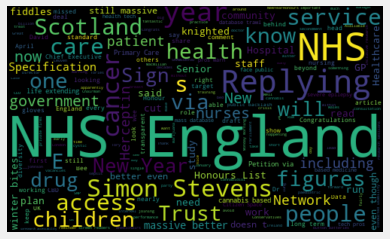

In [ ]:
# Plot The Word Cloud

allWords = ' '.join( [twts for twts in T_NHSB4['Tweet']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

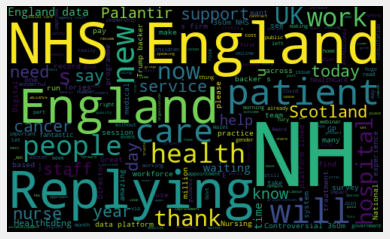

In [ ]:
# Plot The Word Cloud

allWords = ' '.join( [twts for twts in T_NHSAFTER['Tweet']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

T_NHSB4['Analysis'] = T_NHSB4['Polarity'].apply(getAnalysis)

# Show DataFrame
T_NHSB4


<ipython-input-21-cf4c58f896fe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSB4['Analysis'] = T_NHSB4['Polarity'].apply(getAnalysis)


,Tweet,Subjectivity,Polarity,Analysis
0,"Simon Stevens, CEO of NHS England & ‘the 4th m...",0.625758,0.139394,Positive
1,Just wondering when Simon Stevens took up his ...,0.461905,0.278571,Positive
2,NHS England paediatric services in crisis - we...,1.000000,0.250000,Positive
3,"1/15 THREAD: Simon Stevens, appointed Chief Ex...",0.727273,-0.431818,Negative
4,"Sir Simon Stevens, head of NHS England is in t...",0.000000,0.000000,Neutral
...,...,...,...,...
88,"I complained to NHS England, as advised *by th...",0.450000,-0.287500,Negative
89,Replying to \n,0.000000,0.000000,Neutral
90,Follow-up article by \n\n about NHS England di...,0.000000,0.000000,Neutral
91,Replying to \n,0.000000,0.000000,Neutral


In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

T_NHSAFTER['Analysis'] = T_NHSAFTER['Polarity'].apply(getAnalysis)

# Show DataFrame
T_NHSAFTER

<ipython-input-22-69b110c3b265>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_NHSAFTER['Analysis'] = T_NHSAFTER['Polarity'].apply(getAnalysis)


,Tweet,Subjectivity,Polarity,Analysis
0,Tory Donor Will Kolade gave them £570.000.Has ...,0.187500,0.000000,Neutral
1,"The tories have appointed Wol Kolade, managing...",0.287500,-0.050000,Negative
2,"Two Business men, more than £1,000,000 donated...",0.437500,0.250000,Positive
3,NHS England has launched a consultation on how...,0.289773,0.068182,Positive
4,Last year the cost of agency nurses in England...,0.510417,-0.006250,Negative
...,...,...,...,...
444,I do NOT consent to my NHS data being used for...,0.000000,0.000000,Neutral
445,Replying to \n\n \n\n and \n,0.000000,0.000000,Neutral
446,MPs are beginning to see what a huge issue thi...,0.588889,0.088889,Positive
447,What a fab day _IC’s ‘Reinventing IC’ and shar...,0.000000,0.000000,Neutral


In [ ]:
# Print all of the positive tweets
j=1
ST_NHSB4 = T_NHSB4.sort_values(by=['Polarity'])
for i in range(0, ST_NHSB4.shape[0]):
  if(ST_NHSB4['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ST_NHSB4['Tweet'][i])
    print()
    j = j+1


1) Simon Stevens, CEO of NHS England & ‘the 4th most powerful man in the government’ according to the BBC has been knighted in the New Year’s Honours List. Here’s a reminder from the late, much missed, Simon Baker, of Stevens’ massive ‘contribution’ to the dismantling of the NHS.

2) Just wondering when Simon Stevens took up his role at NHS England because apparently he has taken us on a journey to fix the nursing crisis but there are more nursing vacancies than ever. Right now there are 44k. Asking for a friend.

3) NHS England paediatric services in crisis - weirdly no one is suggesting that Matt Hancock should resign over it

4) Using gloves when they are not required carries risks for  patients, nurses & the environment.

More than 1.5 billion boxes of examination gloves are purchased annually in NHS England at a cost of £35m.

Do you know when to wear gloves and when not to?

5) Recognition of a lifetime of dedication & patience. Congratulations lovely Bee Wee, 

 Clin Director fo

In [ ]:
# Print all of the positive tweets After Covid
j=1
ST_NHSAFTER = T_NHSAFTER.sort_values(by=['Polarity'])
for i in range(0, ST_NHSB4.shape[0]):
  if(ST_NHSAFTER['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ST_NHSAFTER['Tweet'][i])
    print()
    j = j+1

1) Two Business men, more than £1,000,000 donated to the Conservative Party. Both involved with Private Healthcare.

Now they are running NHS England.

2) NHS England has launched a consultation on how the future youth gender services should run in the new clinics opening Spring 2023

3) My best friend, of over 30 years is in hospital with blood clots on her lungs. She’s double jabbed. 

 IM COMING FOR YOU.

4) More than 7 million patients are on a NHS waiting lists+in England the service is missing almost 10% of its entire workforce.

Our Health Secretary claims that the NHS ‘doesn’t need cash’.

Politicians are profoundly failing patients+staff, and wilfully ignoring safety problems

5) Apps for Nurse Self-Care  

Technology can be a wonderful thing! Check out these apps to help you stay on target for self-care:

Headspace 
Shine
Sanvello
Classpass
.
.
.
.
careproltduk nhs healthcare uk england selfcare apps motivation healthylifestyle

6) I DO NOT CONSENT TO THIS! 

PLEASE retweet a

In [ ]:
# Print all of the Negative tweets B4 Covid
j=1
ST_NHSB4 = T_NHSB4.sort_values(by=['Polarity'], ascending='False')
for i in range(0, ST_NHSB4.shape[0]):
  if(ST_NHSB4['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ ST_NHSB4['Tweet'][i])
    print()
    j = j+1

 


1) 1/15 THREAD: Simon Stevens, appointed Chief Executive of NHS England in April 2014, has been knighted in the New Year’s Honours List.

Look at the horrific failures the Tories have rewarded him for. 

(Data: NHS England)

2) NHS England to introduce new 28-day cancer target from April with a threshold of between 70-85%. 

.

 warns it may not be deliverable due to ‘desperate’ staff shortages:

3) Was it London? I suspect that Whitehall which gave access of NHS England to Amazon Health Care, may have been behind the hacks. Enemy within.

4) In Leicester, Leicestershire and Rutland the draft Long term plan appears to have gone to NHS England without ever having been presented at a local public board

5) 'Worst-ever' NHS England A&E performance is nearly 20% worse than NHS Scotland  via 


6) NHS England have been issuing a warning about button batteries.  Apparently they are lethal and kill two children a year so be careful if you have them a f keep them away from children!

7) With A

In [ ]:
# Print all of the Negative tweets After Covid 19
j=1
ST_NHSAFTER = T_NHSAFTER.sort_values(by=['Polarity'], ascending='False')
for i in range(0, ST_NHSAFTER.shape[0]):
  if(ST_NHSAFTER['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ ST_NHSAFTER['Tweet'][i])
    print()
    j = j+1

1) The tories have appointed Wol Kolade, managing partner of private equity firm Livingbridge which has multiple investments in private healthcare, to the post of deputy chair of NHS England. He has donated £730,000 to their party

2) Last year the cost of agency nurses in England alone, due to shortages of employed nurses as a result of poor terms and conditions, came in at £3bn. 

Nurses are striking to save the NHS.

3) NHS Health England Education are making a dramatically political statement about trans rights. This is bad for female patients who value their privacy and dignity. But in this thread I want to consider the impact upon employees.

4) Whoever runs this NHS England account
needs a mental health intervention

5) This is extremely worrying. Contract to signed by Sec of State this week.

6) NHS doctors, nurses, administrators - now is the time for you to speak out. NHS England proposes that queer children be punished in your name - barred from changing their name, changing

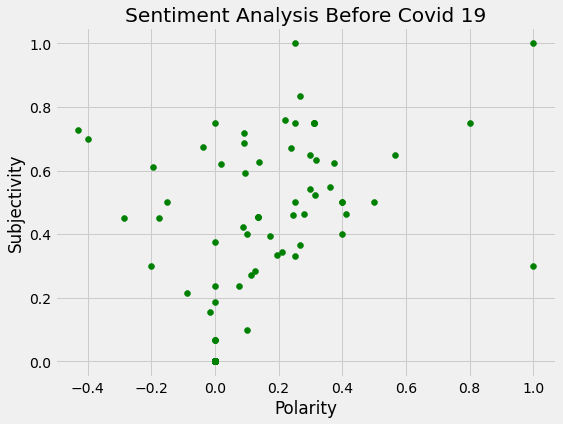

In [ ]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, T_NHSB4.shape[0]):
  plt.scatter(T_NHSB4['Polarity'][i], T_NHSB4['Subjectivity'][i], color='Green')

plt.title('Sentiment Analysis Before Covid 19')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

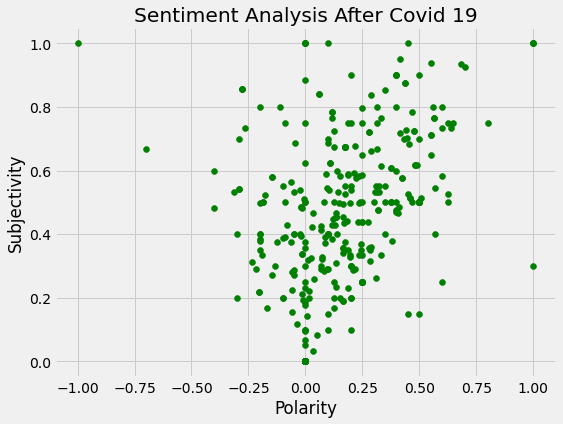

In [ ]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, T_NHSAFTER.shape[0]):
  plt.scatter(T_NHSAFTER['Polarity'][i], T_NHSAFTER['Subjectivity'][i], color='Green')

plt.title('Sentiment Analysis After Covid 19')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

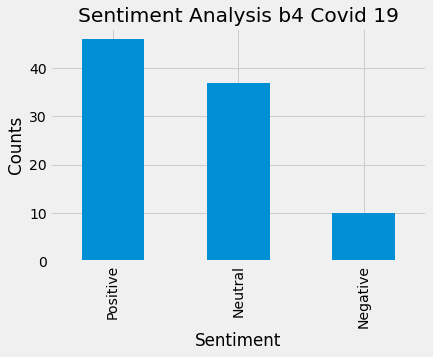

In [ ]:
# Show the Value Counts b4 Covid 19

T_NHSB4['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis b4 Covid 19')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
T_NHSB4['Analysis'].value_counts().plot(kind='bar')
plt.show()

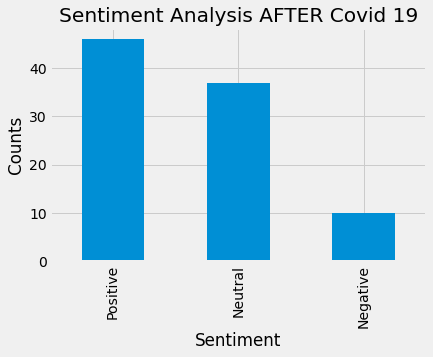

In [ ]:
# Show the Value Counts After Covid 19

T_NHSAFTER['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis AFTER Covid 19')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
T_NHSB4['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Percentage of Positive tweet Before Covid 19

ptweets = T_NHSB4[T_NHSB4.Analysis == 'Positive']
ptweets = ptweets['Tweet']

round( (ptweets.shape[0] / T_NHSB4.shape[0]) *100 , 2)

49.46

In [ ]:
# Percentage of Negative tweet Before Covid 19

ptweets = T_NHSB4[T_NHSB4.Analysis == 'Negative']
ptweets = ptweets['Tweet']

round( (ptweets.shape[0] / T_NHSB4.shape[0]) *100 , 2)

10.75

In [ ]:
# Percentage of Positive tweet AFTER Covid 19

ptweets = T_NHSAFTER[T_NHSAFTER.Analysis == 'Positive']
ptweets = ptweets['Tweet']

round( (ptweets.shape[0] / T_NHSB4.shape[0]) *100 , 2)

248.39

In [ ]:
# Percentage of Negative tweet AFTER Covid 19

ptweets = T_NHSAFTER[T_NHSAFTER.Analysis == 'Negative']
ptweets = ptweets['Tweet']

round( (ptweets.shape[0] / T_NHSB4.shape[0]) *100 , 2)

72.04